In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Load your dataset
data = pd.read_csv('green_yashviiiii.csv')

In [3]:
# Check if the dataset is loaded correctly
print(data.head())  # Check the first few rows of the dataset

   AGE  SEX  SMOKING  DIABETES  OBESITY  ANAEMIA  HIGH BLOOD PRESSURE  \
0   63    1        1         0        1        1                    0   
1   55    1        0         1        1        1                    1   
2   71    0        0         0        1        0                    0   
3   49    1        0         1        1        1                    1   
4   70    0        0         1        1        0                    1   

   CHOLESTROL  ECG RESULT  HEART FAILURE  
0         233           0              0  
1         250           1              1  
2         204           0              1  
3         236           1              0  
4         354           1              1  


In [4]:
# Split dataset into features (X) and target variable (y)
X = data.drop('HEART FAILURE', axis=1)  # Features
y = data['HEART FAILURE']                # Target variable

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Initialize and train the model (Example: Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [7]:
# Train the model on the training data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
# Make predictions
y_pred = model.predict(X_test)


In [9]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.987487969201155


Precision: 0.9889624724061811
Recall: 0.9824561403508771
F1-score: 0.9856985698569857
Confusion Matrix:
[[578   5]
 [  8 448]]


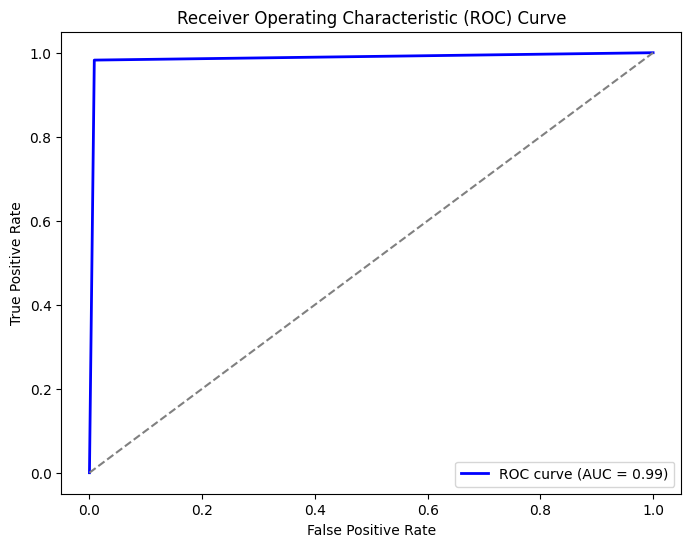

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot ROC curve and calculate AUC-ROC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()





In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of trees in the forest
    # Add more hyperparameters to tune if needed
}

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize Grid Search Cross Validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform Grid Search Cross Validation
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


In [ ]:
# Initialize the Random Forest Classifier with the best parameters
best_rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Retrain the model on the entire training dataset
best_rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
best_y_pred = best_rf_classifier.predict(X_test)

# Evaluate the model's performance
best_accuracy = accuracy_score(y_test, best_y_pred)
print("Best Model Accuracy:", best_accuracy)


In [ ]:
# Get feature importances
feature_importances = best_rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


In [ ]:
import numpy as np

# Define the range of values for the feature
feature_values = np.linspace(X_train['AGE'].min(), X_train['AGE'].max(), num=50)

# Calculate the average predicted probability for each value of the feature
pdp_values = []
for value in feature_values:
    X_temp = X_train.copy()
    X_temp['AGE'] = value
    pdp_values.append(np.mean(best_rf_classifier.predict_proba(X_temp)[:, 1]))

# Plot the PDP
plt.figure(figsize=(8, 6))
plt.plot(feature_values, pdp_values, marker='o')
plt.xlabel('Age')
plt.ylabel('Partial Dependence')
plt.title('Partial Dependence Plot for Age')
plt.show()



In [ ]:
# Make predictions on the test data
y_pred_test = best_rf_classifier.predict(X_test)

# Evaluate the model's performance on the test data
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

print("Test Set Performance Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_test)
print("Confusion Matrix:")
print(conf_matrix_test)


In [ ]:
# Example of a patient with severe heart failure
example_data_severe_heart_failure = [[55, 1, 0, 1, 1, 1, 1, 250, 1]]

# Predict using the trained model
prediction_severe_heart_failure = best_rf_classifier.predict(example_data_severe_heart_failure)

# Map the prediction to a human-readable label
prediction_label_severe_heart_failure = "Heart Failure" if prediction_severe_heart_failure[0] == 1 else "No Heart Failure"

print("Prediction for the example data (Severe Heart Failure):")
print("Prediction:", prediction_label_severe_heart_failure)


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('green_yashviiiii.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Display basic statistics of the dataset
print("\nBasic statistics of the dataset:")
print(data.describe())

# Check the shape of the dataset
print("\nShape of the dataset:", data.shape)


In [18]:
from sklearn.ensemble import RandomForestClassifier

# Split dataset into features (X) and target variable (y)
X = data.drop('HEART FAILURE', axis=1)  # Features
y = data['HEART FAILURE']                # Target variable

# Get feature names
feature_names = X.columns

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model (Example: Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Set feature names to the feature_importances_ attribute
model.feature_names = feature_names

# Make predictions
y_pred = model.predict(X_test)


In [ ]:
import pandas as pd

# Example data with feature names
example_data = pd.DataFrame({
    'AGE': [63, 55, 71, 49, 70],
    'SEX': [1, 1, 0, 1, 0],
    'SMOKING': [1, 0, 0, 0, 0],
    'DIABETES': [0, 1, 0, 1, 1],
    'OBESITY': [1, 1, 1, 1, 1],
    'ANAEMIA': [1, 1, 0, 1, 0],
    'HIGH BLOOD PRESSURE': [0, 1, 0, 1, 1],
    'CHOLESTROL': [233, 250, 204, 236, 354],
    'ECG RESULT': [0, 1, 0, 1, 1]
})

# Predict using the trained model
predictions = model.predict(example_data)

# Map the predictions to human-readable labels
prediction_labels = ["Heart Failure" if prediction == 1 else "No Heart Failure" for prediction in predictions]

# Print the predictions
for i, prediction_label in enumerate(prediction_labels, start=1):
    print(f"Prediction for sample row {i}: {prediction_label}")


In [ ]:
import pickle

# Define the file path to save the model
model_file_path = 'heart_health_model.pkl'

# Save the trained model to a file
with open(model_file_path, 'wb') as f:
    pickle.dump(model, f)

print("Model saved successfully!")
